Enter a vinho verde variety: red(R) or white(W)W
winequality-white.csv
Before SMOTE: Counter({6.0: 1758, 5.0: 1166, 7.0: 704, 8.0: 140, 4.0: 130, 3.0: 16, 9.0: 4})


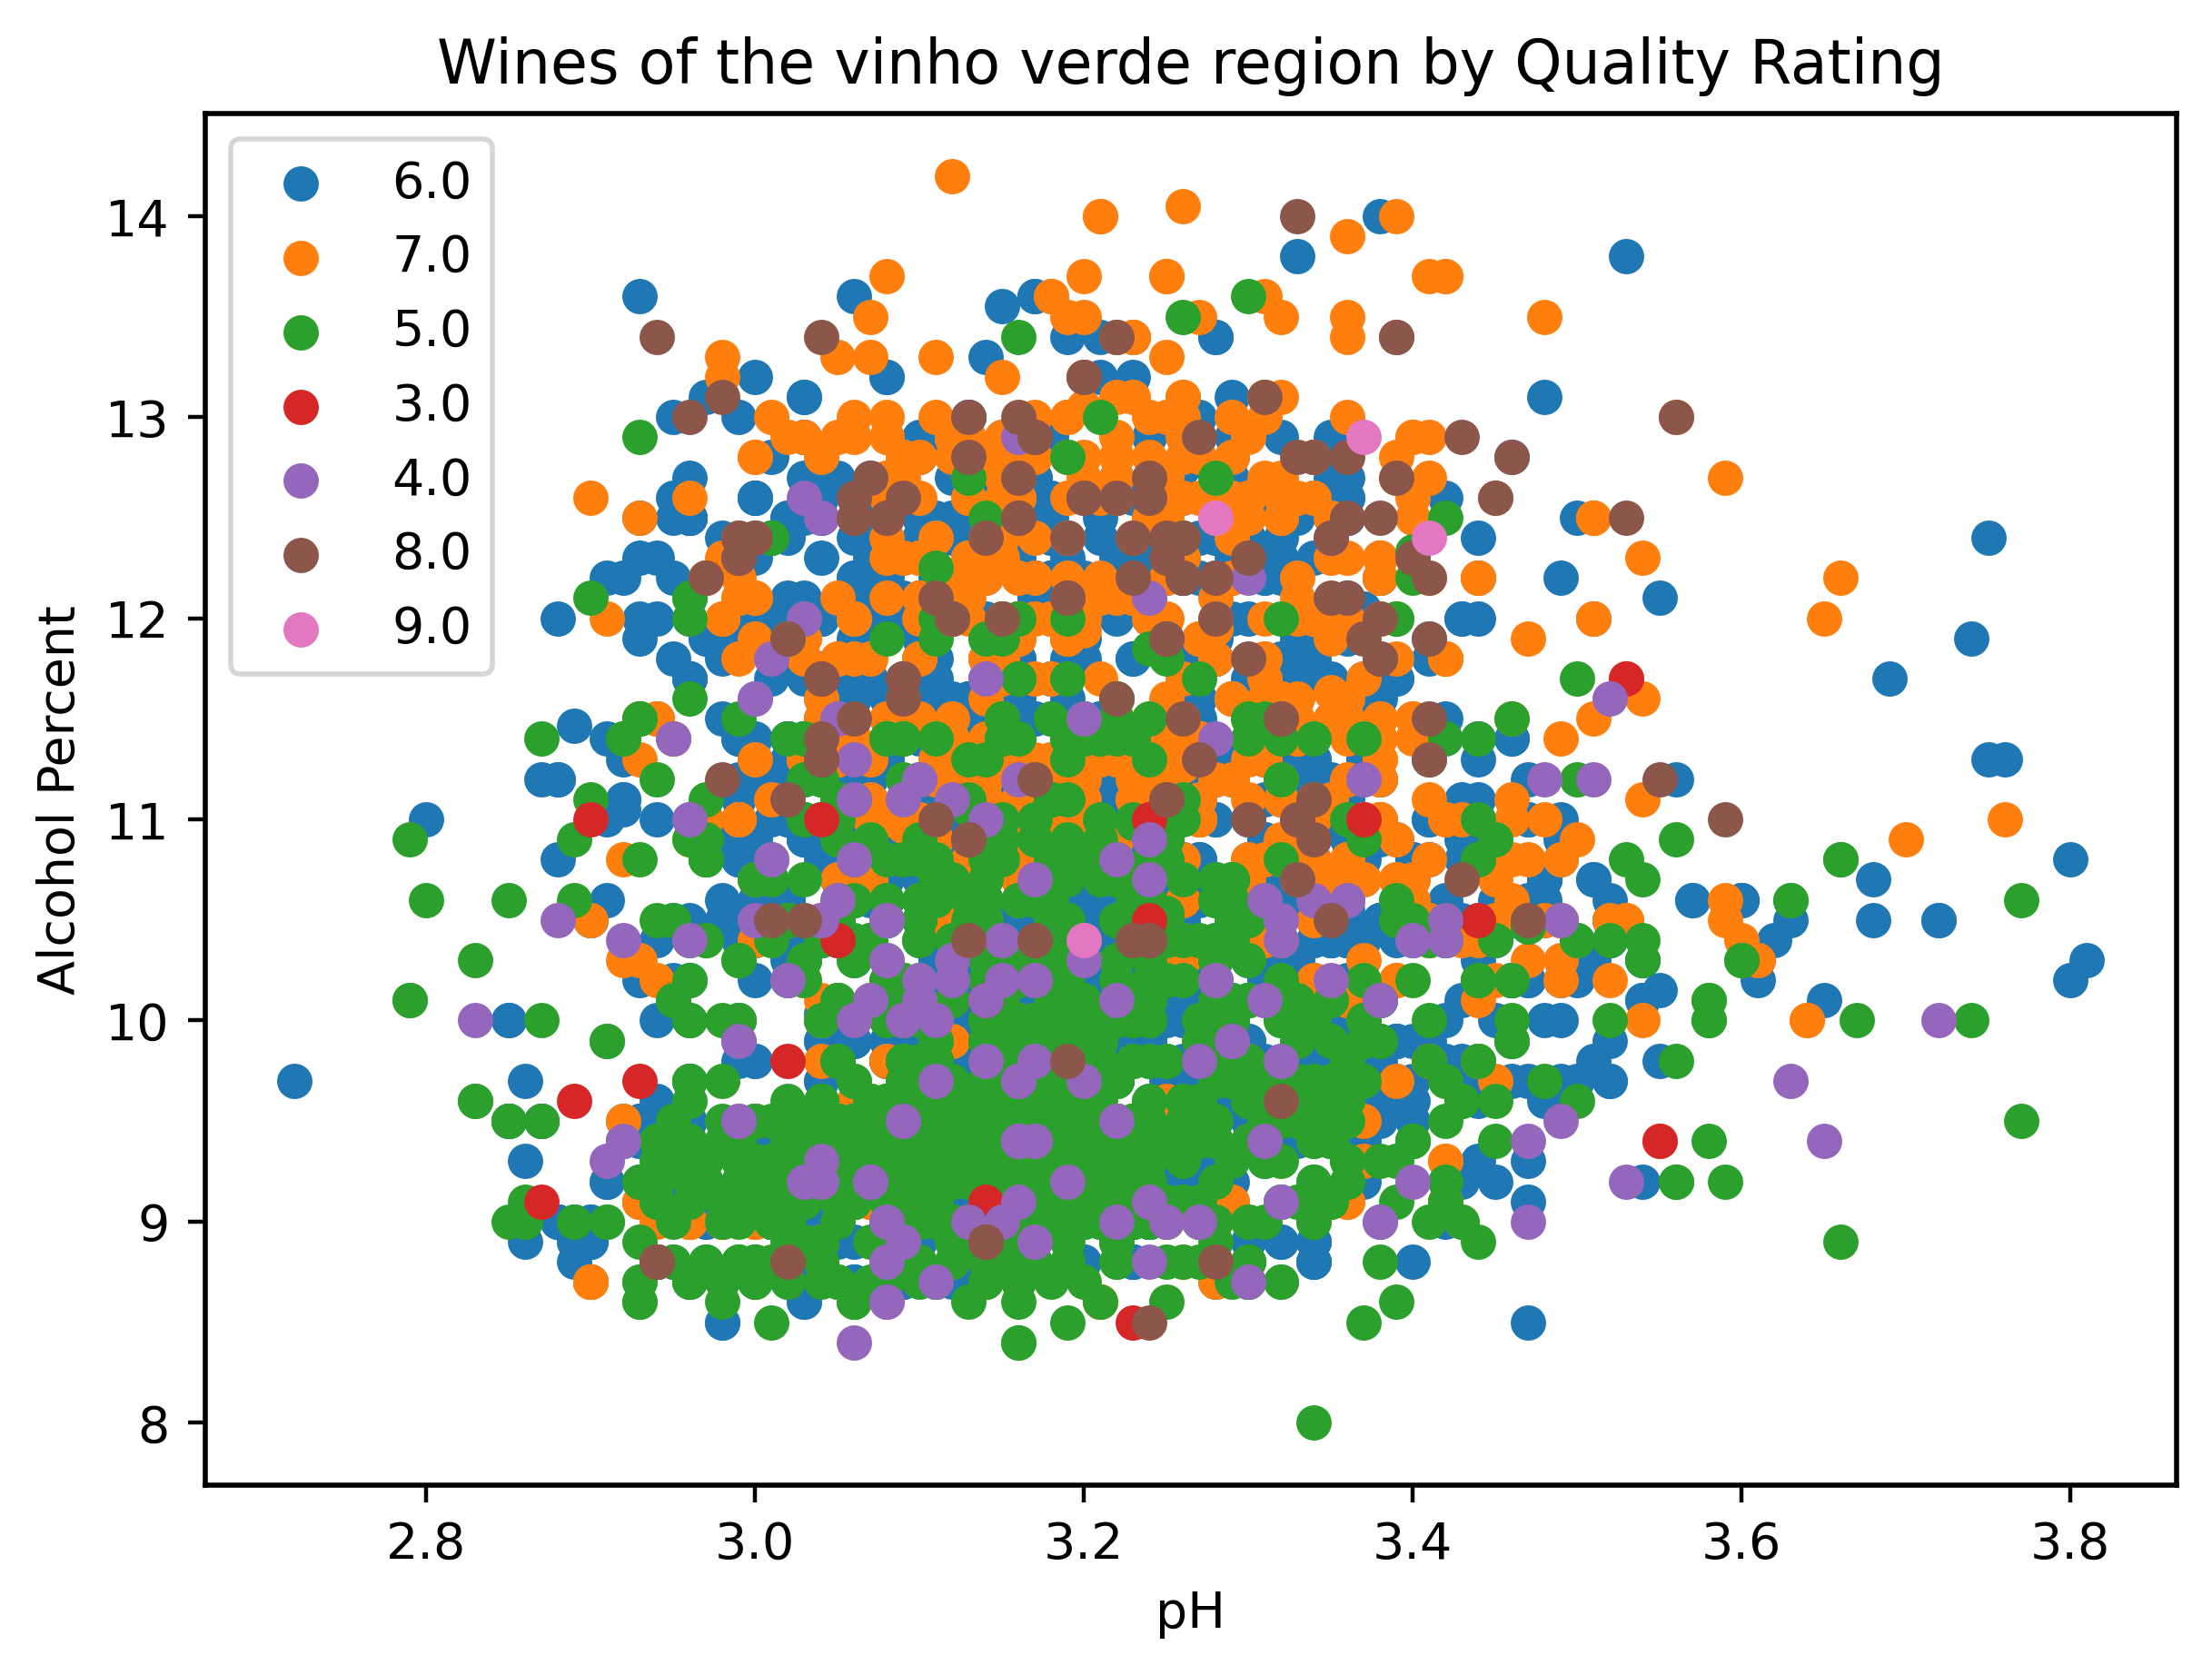

In [4]:
filename=input('Enter a vinho verde variety: red(R) or white(W)')

from pandas import read_csv
from matplotlib import pyplot
import matplotlib
from sklearn.model_selection import train_test_split
from collections import Counter
from numpy import where

# Load dataset
if filename == 'R':
    filename = 'winequality-red.csv'
elif filename == 'W':
    filename = 'winequality-white.csv'
else:
    filename=input('Please enter one of two varietals: red(R) or white(W)')

try:
    print(filename)
    
    names = ['FIXACID', 'VOLACID', 'CITACID', 'RESSUGAR', 'CHLORIDES', 'FSULFDIOX',
    'TOTSULFDIOX', 'DENSITY', 'PH', 'SULPHATES','ALCOHOL','QUALITY']
    dataset = read_csv(filename, header=0, sep=';',names=names, na_values='.')

    matplotlib.rcParams["axes.linewidth"] = 1 #formerly 3
    matplotlib.rcParams["lines.linewidth"] = 1 #formerly 3
    matplotlib.rcParams['figure.figsize'] = [7, 5]
    matplotlib.rcParams['figure.dpi'] = 400 

    # Split-out validation dataset
    array = dataset.values
    X = array[:,0:11]
    Y = array[:,11]
    validation_size = 0.20
    seed = 7

    X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
        test_size=validation_size, random_state=seed, stratify=Y)
    counter=Counter(Y_train)
    print('Before SMOTE:',counter)
    # scatter plot of examples by class label

    #print(X_train[:6,:])
    # scatter plot of examples by class label: pH (8) x Alcohol (10)
    # Both pH and Alcohol are correlated with Quality
    for label, _ in counter.items():
        #row_ix returns an array containing all the row numbers for a given label (color)
        row_ix = where(Y_train == label)[0]
        #print("row_ix", row_ix)
        pyplot.scatter(X_train[row_ix, 8], X_train[row_ix, 10], label=str(label))
    pyplot.legend()
    pyplot.title("Wines of the vinho verde region by quality rating")
    pyplot.xlabel("pH")
    pyplot.ylabel("Alcohol Percent")
    pyplot.show()
except:
    print('Exiting function.')